## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.908311 -0.438996 -0.109544  0.219247 -0.237605 -0.794523
1 -0.289437  0.914531 -0.365821 -1.466824 -0.472656 -0.723487
2  0.223805 -1.434135  1.387935  0.794185 -0.639021 -0.054361
3 -0.699885 -0.968828  0.175751 -0.446459 -0.515133 -1.379384
4  0.899159 -1.006438  0.466969  0.361200  0.686090  0.199995


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0205829	total: 68.1ms	remaining: 1m 7s
1:	learn: 1.0099216	total: 68.8ms	remaining: 34.3s
2:	learn: 0.9992613	total: 69.4ms	remaining: 23.1s
3:	learn: 0.9892966	total: 70.3ms	remaining: 17.5s
4:	learn: 0.9805195	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9693580	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9587819	total: 72ms	remaining: 10.2s
7:	learn: 0.9505192	total: 72.6ms	remaining: 9s
8:	learn: 0.9415794	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9317455	total: 73.6ms	remaining: 7.29s
10:	learn: 0.9222898	total: 74.1ms	remaining: 6.67s
11:	learn: 0.9113895	total: 74.7ms	remaining: 6.15s
12:	learn: 0.9016070	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8928834	total: 75.6ms	remaining: 5.33s
14:	learn: 0.8849993	total: 76.3ms	remaining: 5.01s
15:	learn: 0.8757418	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8679008	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8608034	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8517334	total: 78.2ms	remaining: 4.0

88:	learn: 0.4624792	total: 109ms	remaining: 1.12s
89:	learn: 0.4593765	total: 110ms	remaining: 1.11s
90:	learn: 0.4561537	total: 110ms	remaining: 1.1s
91:	learn: 0.4521655	total: 111ms	remaining: 1.09s
92:	learn: 0.4483053	total: 111ms	remaining: 1.08s
93:	learn: 0.4451489	total: 112ms	remaining: 1.08s
94:	learn: 0.4416705	total: 112ms	remaining: 1.07s
95:	learn: 0.4381786	total: 113ms	remaining: 1.06s
96:	learn: 0.4350996	total: 113ms	remaining: 1.06s
97:	learn: 0.4317615	total: 114ms	remaining: 1.05s
98:	learn: 0.4276310	total: 115ms	remaining: 1.04s
99:	learn: 0.4244418	total: 115ms	remaining: 1.04s
100:	learn: 0.4214551	total: 116ms	remaining: 1.03s
101:	learn: 0.4183125	total: 116ms	remaining: 1.02s
102:	learn: 0.4150894	total: 117ms	remaining: 1.01s
103:	learn: 0.4122626	total: 117ms	remaining: 1.01s
104:	learn: 0.4088963	total: 117ms	remaining: 1s
105:	learn: 0.4055318	total: 118ms	remaining: 993ms
106:	learn: 0.4022291	total: 118ms	remaining: 987ms
107:	learn: 0.3995458	total:

253:	learn: 0.1603492	total: 188ms	remaining: 551ms
254:	learn: 0.1596258	total: 188ms	remaining: 550ms
255:	learn: 0.1585018	total: 189ms	remaining: 548ms
256:	learn: 0.1574475	total: 189ms	remaining: 546ms
257:	learn: 0.1566275	total: 189ms	remaining: 544ms
258:	learn: 0.1557699	total: 190ms	remaining: 543ms
259:	learn: 0.1548806	total: 190ms	remaining: 541ms
260:	learn: 0.1539934	total: 191ms	remaining: 540ms
261:	learn: 0.1531511	total: 191ms	remaining: 538ms
262:	learn: 0.1523283	total: 192ms	remaining: 537ms
263:	learn: 0.1516856	total: 192ms	remaining: 535ms
264:	learn: 0.1512132	total: 192ms	remaining: 534ms
265:	learn: 0.1506697	total: 193ms	remaining: 532ms
266:	learn: 0.1497772	total: 193ms	remaining: 530ms
267:	learn: 0.1490484	total: 194ms	remaining: 529ms
268:	learn: 0.1481183	total: 194ms	remaining: 527ms
269:	learn: 0.1473637	total: 194ms	remaining: 525ms
270:	learn: 0.1466924	total: 195ms	remaining: 524ms
271:	learn: 0.1458530	total: 195ms	remaining: 522ms
272:	learn: 

477:	learn: 0.0519048	total: 293ms	remaining: 320ms
478:	learn: 0.0516053	total: 293ms	remaining: 319ms
479:	learn: 0.0513888	total: 295ms	remaining: 319ms
480:	learn: 0.0511624	total: 295ms	remaining: 318ms
481:	learn: 0.0508721	total: 295ms	remaining: 317ms
482:	learn: 0.0505329	total: 296ms	remaining: 317ms
483:	learn: 0.0502500	total: 296ms	remaining: 316ms
484:	learn: 0.0500440	total: 297ms	remaining: 315ms
485:	learn: 0.0498496	total: 297ms	remaining: 314ms
486:	learn: 0.0495746	total: 298ms	remaining: 313ms
487:	learn: 0.0492516	total: 298ms	remaining: 313ms
488:	learn: 0.0489837	total: 299ms	remaining: 313ms
489:	learn: 0.0487955	total: 300ms	remaining: 312ms
490:	learn: 0.0485253	total: 300ms	remaining: 311ms
491:	learn: 0.0483324	total: 301ms	remaining: 310ms
492:	learn: 0.0481123	total: 301ms	remaining: 310ms
493:	learn: 0.0478797	total: 302ms	remaining: 309ms
494:	learn: 0.0476116	total: 302ms	remaining: 308ms
495:	learn: 0.0473516	total: 302ms	remaining: 307ms
496:	learn: 

641:	learn: 0.0237357	total: 371ms	remaining: 207ms
642:	learn: 0.0235920	total: 371ms	remaining: 206ms
643:	learn: 0.0235124	total: 372ms	remaining: 206ms
644:	learn: 0.0233722	total: 373ms	remaining: 205ms
645:	learn: 0.0233133	total: 373ms	remaining: 204ms
646:	learn: 0.0232294	total: 374ms	remaining: 204ms
647:	learn: 0.0231120	total: 374ms	remaining: 203ms
648:	learn: 0.0229967	total: 374ms	remaining: 202ms
649:	learn: 0.0229132	total: 375ms	remaining: 202ms
650:	learn: 0.0228198	total: 375ms	remaining: 201ms
651:	learn: 0.0227153	total: 376ms	remaining: 201ms
652:	learn: 0.0226393	total: 376ms	remaining: 200ms
653:	learn: 0.0225673	total: 377ms	remaining: 199ms
654:	learn: 0.0224340	total: 377ms	remaining: 199ms
655:	learn: 0.0223597	total: 378ms	remaining: 198ms
656:	learn: 0.0222805	total: 378ms	remaining: 197ms
657:	learn: 0.0221820	total: 379ms	remaining: 197ms
658:	learn: 0.0220895	total: 379ms	remaining: 196ms
659:	learn: 0.0219807	total: 380ms	remaining: 196ms
660:	learn: 

861:	learn: 0.0097663	total: 476ms	remaining: 76.2ms
862:	learn: 0.0097419	total: 477ms	remaining: 75.7ms
863:	learn: 0.0097093	total: 477ms	remaining: 75.1ms
864:	learn: 0.0096701	total: 478ms	remaining: 74.5ms
865:	learn: 0.0096463	total: 478ms	remaining: 73.9ms
866:	learn: 0.0095985	total: 478ms	remaining: 73.4ms
867:	learn: 0.0095470	total: 479ms	remaining: 72.8ms
868:	learn: 0.0095039	total: 479ms	remaining: 72.3ms
869:	learn: 0.0094571	total: 480ms	remaining: 71.7ms
870:	learn: 0.0094269	total: 480ms	remaining: 71.1ms
871:	learn: 0.0093896	total: 481ms	remaining: 70.6ms
872:	learn: 0.0093603	total: 481ms	remaining: 70ms
873:	learn: 0.0093107	total: 482ms	remaining: 69.4ms
874:	learn: 0.0092654	total: 482ms	remaining: 68.9ms
875:	learn: 0.0092368	total: 483ms	remaining: 68.3ms
876:	learn: 0.0092013	total: 483ms	remaining: 67.7ms
877:	learn: 0.0091729	total: 483ms	remaining: 67.2ms
878:	learn: 0.0091251	total: 484ms	remaining: 66.6ms
879:	learn: 0.0090909	total: 484ms	remaining: 66

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

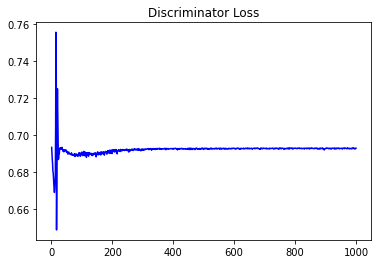

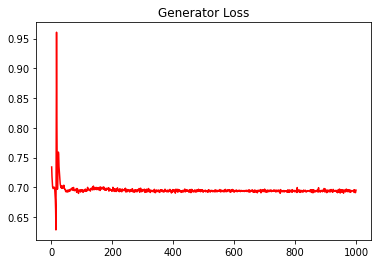

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.047449883613260316


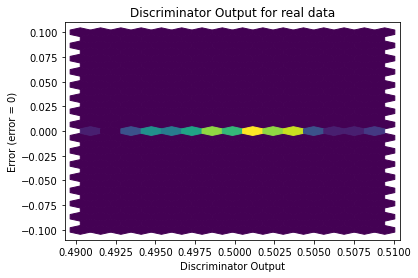

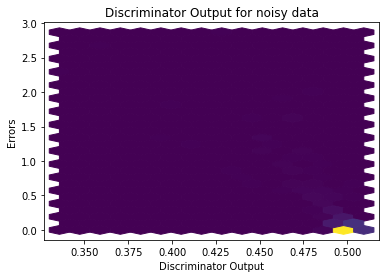

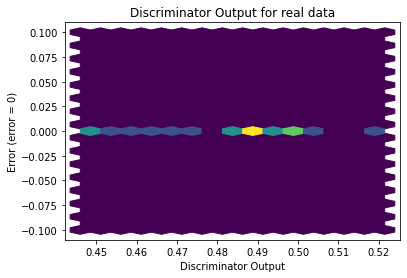

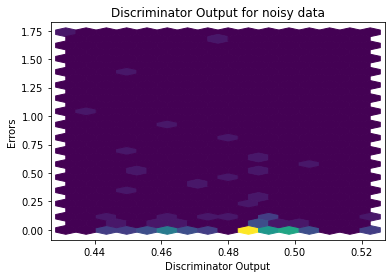

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


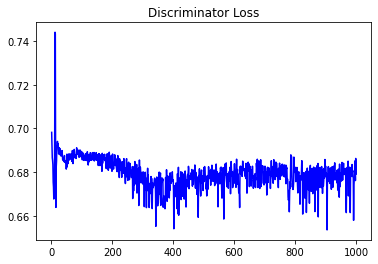

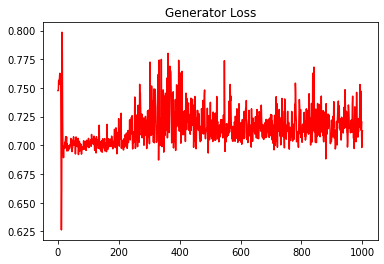

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04700942289299249


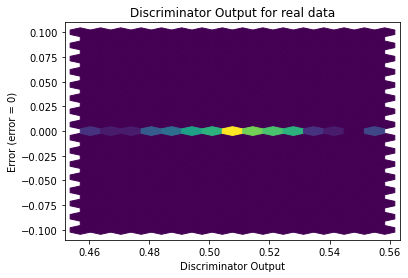

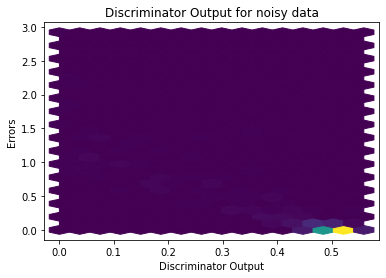

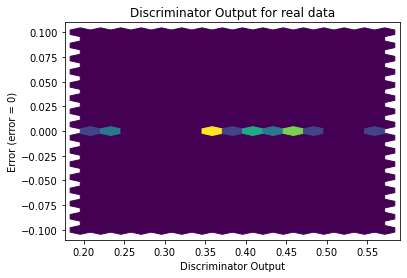

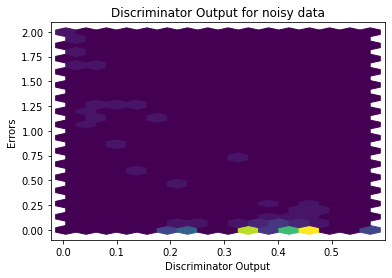

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1929]], requires_grad=True)
